
References: 
1. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. https://en.wikipedia.org/wiki/List_of_dynamical_systems_and_differential_equations_topics
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf (also in downloads)
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn poster - http://roseyu.com/Materials/nips17-tsw-poster.pdf
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [1]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [2]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Generate Time Series using the Lorenz System of DE

In [4]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [5]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [6]:
sigma=10.0
beta=8./3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [7]:
#print (t)

In [8]:
N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[ -3.94238243   7.9346716    5.75234579]
 [ -9.79242848   7.0688651    6.21452969]
 [  7.9902317   -5.09024253  11.55100924]
 [  2.33413069  10.9823917    9.72005176]
 [ -8.76064236 -10.76601914  -9.46400322]]
Random point1 =  [0.75208614 0.90174004 0.3515239 ]
shape of t =  (1000,)
 lor1 =  [[  0.75208614   0.90174004   0.3515239 ]
 [  0.75953626   0.98161617   0.35062454]
 [  0.76984112   1.0621572    0.35001227]
 ...
 [ -9.73217363 -10.59186698  27.46599757]
 [ -9.76545932 -10.56801962  27.58510019]
 [ -9.79641399 -10.53969068  27.70327507]]
shape of lor1 =  (1000, 3)


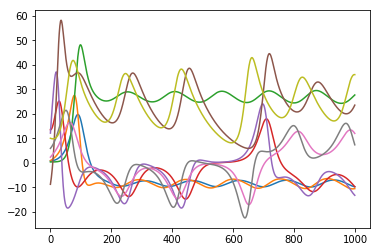

In [9]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

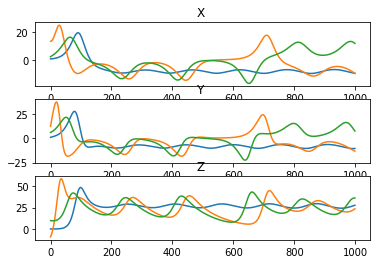

In [10]:

plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.show()

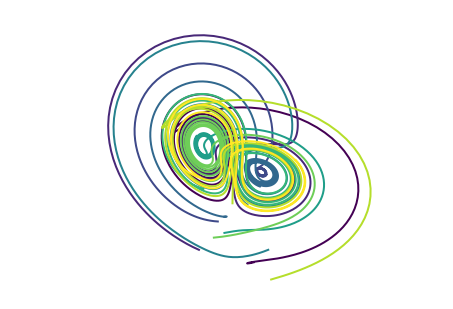

In [11]:
t, x_t = solve_lorenz_graph(angle=0, N=10) #angle initially at 0, butterfly at 134

In [12]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

A Jupyter Widget

In [13]:
#t, x_t = widget.result

In [14]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, chnage to 100 later

In [15]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [16]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [17]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [18]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [19]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [20]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [21]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (len(lorenz_train))

(7, 1000, 3)
7


In [22]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of training output: " , y_train.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of test input:  (3956, 10, 3)
Shape of training output:  (7912, 3)
Shape of testing output:  (3956, 3)


In [23]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [24]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


## Build Neural Network model in Keras

In [25]:
print('Build model...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, 3)))
model.add(Dense(32))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build model...
Train...


In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=10)

Train on 7912 samples, validate on 3956 samples
Epoch 1/10
 - 5s - loss: 44.9920 - val_loss: 2.2255
Epoch 2/10
 - 5s - loss: 1.3555 - val_loss: 0.6315
Epoch 3/10
 - 4s - loss: 0.3062 - val_loss: 0.2635
Epoch 4/10
 - 4s - loss: 0.1011 - val_loss: 0.1723
Epoch 5/10
 - 4s - loss: 0.0419 - val_loss: 0.1378
Epoch 6/10
 - 4s - loss: 0.0258 - val_loss: 0.1296
Epoch 7/10
 - 4s - loss: 0.0205 - val_loss: 0.1200
Epoch 8/10
 - 4s - loss: 0.0329 - val_loss: 0.1640
Epoch 9/10
 - 4s - loss: 0.0449 - val_loss: 0.1261
Epoch 10/10
 - 4s - loss: 0.0279 - val_loss: 0.1002


## Plot original values and predictions

In [48]:
#trainPredict = model.predict(x_train)
trainPredict = model.predict(lorenz_train)
testPredict = model.predict(x_test)

(1000, 3)
(7, 3)


[]

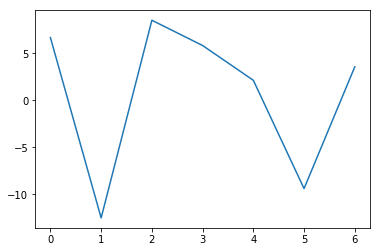

In [49]:
print (lorenz_train[1].shape)
print (trainPredict.shape)
plt.plot(trainPredict[:,0:1])
plt.plot()

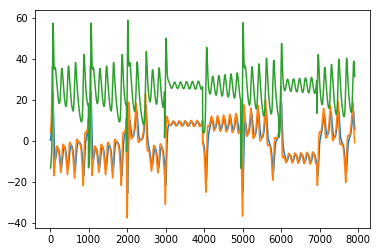

In [28]:
from matplotlib import pyplot as plt
# plot baseline and predictions
#plt.plot(x_train, linestyle=':')

plt.plot(trainPredict)
#list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
#plt.plot(list,testPredict)

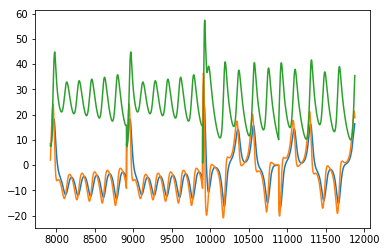

In [29]:
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list,testPredict) # plot baseline and predictions

In [30]:
print(trainPredict-y_train)

[[ 0.20512144 -0.39980122  0.43197759]
 [ 0.13033972 -0.32504627  0.31663499]
 [ 0.07732927 -0.25258618  0.21279605]
 ...
 [-0.12215203 -0.0189181  -0.02759495]
 [-0.11229507 -0.01309111 -0.02834311]
 [-0.10215065 -0.00669023 -0.03433987]]


## Calculate difference between prediction and actual

In [31]:
print (y_test.shape)
print (y_test)

(3956, 3)
[[ 9.50743691  4.78218811  5.05422845]
 [ 9.33868889  5.62420225  5.19580543]
 [ 9.20915422  6.44350491  5.36346359]
 ...
 [15.98936717 19.81395459 33.41044267]
 [16.1306741  19.35847338 34.30881879]
 [16.2473985  18.84463462 35.17646154]]


In [32]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(3956, 1, 3)
[[[ 9.50743691  4.78218811  5.05422845]]

 [[ 9.33868889  5.62420225  5.19580543]]

 [[ 9.20915422  6.44350491  5.36346359]]

 ...

 [[15.98936717 19.81395459 33.41044267]]

 [[16.1306741  19.35847338 34.30881879]]

 [[16.2473985  18.84463462 35.17646154]]]


In [33]:
print (testPredict.shape)
print (testPredict)

(3956, 3)
[[ 8.451718   1.96522    7.7932305]
 [ 8.230512   2.851667   7.8615546]
 [ 8.053957   3.8381896  7.793286 ]
 ...
 [16.04407   19.79659   33.78878  ]
 [16.191462  19.306728  34.625725 ]
 [16.29354   18.76084   35.427574 ]]


In [34]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[[-1.05571858e+00 -2.81696814e+00  2.73900208e+00]
  [-1.27692524e+00 -1.93052118e+00  2.80732617e+00]
  [-1.45347992e+00 -9.43998508e-01  2.73905739e+00]
  ...
  [ 6.53663238e+00  1.50144027e+01  2.87345518e+01]
  [ 6.68402466e+00  1.45245403e+01  2.95714963e+01]
  [ 6.78610214e+00  1.39786514e+01  3.03733457e+01]]

 [[-8.86970561e-01 -3.65898227e+00  2.59742511e+00]
  [-1.10817723e+00 -2.77253532e+00  2.66574920e+00]
  [-1.28473191e+00 -1.78601264e+00  2.59748042e+00]
  ...
  [ 6.70538040e+00  1.41723886e+01  2.85929748e+01]
  [ 6.85277267e+00  1.36825261e+01  2.94299194e+01]
  [ 6.95485016e+00  1.31366372e+01  3.02317687e+01]]

 [[-7.57435889e-01 -4.47828493e+00  2.42976694e+00]
  [-9.78642554e-01 -3.59183798e+00  2.49809103e+00]
  [-1.15519723e+00 -2.60531531e+00  2.42982225e+00]
  ...
  [ 6.83491507e+00  1.33530859e+01  2.84253166e+01]
  [ 6.98230734e+00  1.28632235e+01  2.92622612e+01]
  [ 7.08438483e+00  1.23173346e+01  3.00641106e+01]]

 ...

 [[-7.53764884e+00 -1.78487346e+01

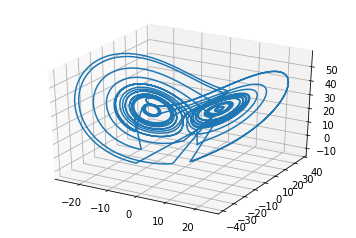

In [35]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(y_train[:,0],y_train[:,1],y_train[:,2])
plt.show()

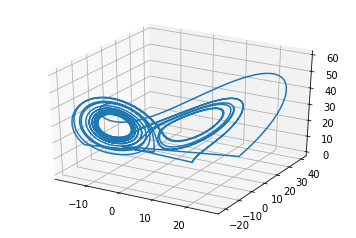

In [36]:

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(y_test[:,0],y_test[:,1],y_test[:,2])
plt.show()

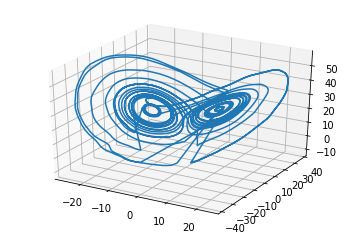

In [37]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(trainPredict[:,0],trainPredict[:,1],trainPredict[:,2])
plt.show()

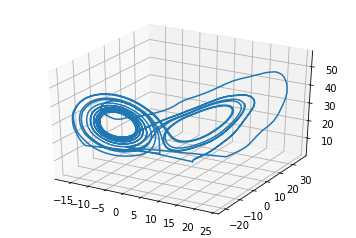

In [38]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(testPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()